<a href="https://colab.research.google.com/github/renatafrustockl/Bootcamp-IGTI---analista-de-Machine-Learning/blob/main/ML_Desafio1_FAM_RENATA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Este programa é utilizado para o desenvolvimento do trabalho prático da disciplina FAM do bootcamp de MLE

In [ ]:
#importando as bibliotecas
import pandas as pd #biblioteca utilizada para o tratamento de dados via dataframes 
import numpy as np #biblioteca utilizada para o tratamento de valores numéricos (vetores e matrizes)
import matplotlib.pyplot as plt #biblioteca utilizada para construir os gráficos
from sklearn.metrics import accuracy_score


In [ ]:
from google.colab import files  #biblioteca utilizada para carregar os dados para o google colab
uploaded = files.upload()

Saving comp_bikes_mod.csv to comp_bikes_mod.csv


In [ ]:
#realizando a leitura do arquivo (dataset)
nome_do_arquivo="comp_bikes_mod.csv"
df_bikes= pd.read_csv(nome_do_arquivo)

In [ ]:
#apresentando as 5 primeiras linhas do dataset
df_bikes.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1.0,NaN,1.0,0.0,1.0,0.0,0.0,6.0,0.0,1.0,NaN,0.2879,0.81,0.0,3.0,13.0,16.0
1,2.0,2011-01-01,1.0,0.0,1.0,1.0,0.0,6.0,0.0,NaN,0.22,0.2727,0.80,0.0,8.0,32.0,40.0
2,3.0,2011-01-01,1.0,0.0,1.0,2.0,0.0,6.0,0.0,1.0,0.22,0.2727,0.80,0.0,5.0,27.0,32.0
3,4.0,2011-01-01,1.0,0.0,1.0,3.0,0.0,6.0,0.0,1.0,0.24,0.2879,0.75,0.0,3.0,10.0,13.0
4,5.0,2011-01-01,1.0,0.0,1.0,4.0,0.0,6.0,NaN,1.0,0.24,0.2879,0.75,0.0,0.0,1.0,1.0


In [ ]:
df_bikes.info() #verificando os tipos de variáveis e se existem ou não valores nulos

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     15641 non-null  float64
 1   dteday      15641 non-null  object 
 2   season      15641 non-null  float64
 3   yr          15641 non-null  float64
 4   mnth        15641 non-null  float64
 5   hr          15641 non-null  float64
 6   holiday     15641 non-null  float64
 7   weekday     15641 non-null  float64
 8   workingday  15641 non-null  float64
 9   weathersit  15641 non-null  float64
 10  temp        15641 non-null  float64
 11  atemp       15641 non-null  float64
 12  hum         15641 non-null  float64
 13  windspeed   15641 non-null  float64
 14  casual      15641 non-null  float64
 15  registered  15641 non-null  float64
 16  cnt         15641 non-null  float64
dtypes: float64(16), object(1)
memory usage: 2.3+ MB


**Existem Colunas Com Valores Nulos?**

In [ ]:
#NOVA - % de valores nulos na coluna temp
nulos_temp = df_bikes['temp'].isna().sum()
total = df_bikes.shape[0]

porc_nulos_temp = nulos_temp / total * 100

porc_nulos_temp

10.000575407100524

In [ ]:
df_bikes.shape

(17379, 17)

**Quantas Instâncias e Características Existem no Dataset?**



In [ ]:
#NOVAeliminando linhas null para a coluna dteday DUVIDA DUVIDA
df_bikes.isnull().sum()
df_new = df_bikes[df_bikes['dteday'].notnull()]


In [ ]:
#NOVA
df_new.shape

(15641, 17)

In [ ]:
#analisando a "estatística" do dataset
#df_bikes.describe()
df_new.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,14060.000000,14061.000000,14076.000000,14062.000000,14068.000000,14076.000000,14078.000000,14097.000000,14078.000000,14066.000000,14076.000000,14070.000000,14082.000000,14071.000000,14090.000000,14079.000000
mean,8679.717496,2.507930,0.501563,6.542810,11.486779,0.027707,3.006535,0.683053,1.422432,0.496926,0.476055,0.627357,0.189552,35.416317,153.280625,189.165850
std,5015.960092,1.110674,0.500015,3.443693,6.915101,0.164137,2.002829,0.465303,0.638937,0.192971,0.172827,0.192863,0.122309,48.770799,151.317869,181.223589
min,2.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4336.250000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8677.500000,3.000000,1.000000,7.000000,11.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.164200,17.000000,115.000000,142.000000
75%,13024.250000,3.000000,1.000000,10.000000,17.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,219.000000,280.000000
max,17376.000000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**TRANSFORMANDO A COLUNA SEASON EM DADOS CATEGÓRICOS
**

In [ ]:
#NOVO TRANSFORMANDO A COLUNA SEASON EM DADOS CATEGÓRICOS
#CERTO df_new['season'] = df_new['season'].astype('category')

df_new.season = pd.Categorical(df_new.season)
df_new.season.value_counts()


/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


3.0    3623
2.0    3523
4.0    3478
1.0    3437
Name: season, dtype: int64

In [ ]:
#NOVO - 
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15641 entries, 1 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     14060 non-null  float64       
 1   dteday      15641 non-null  datetime64[ns]
 2   season      14061 non-null  category      
 3   yr          14076 non-null  float64       
 4   mnth        14062 non-null  float64       
 5   hr          14068 non-null  float64       
 6   holiday     14076 non-null  float64       
 7   weekday     14078 non-null  float64       
 8   workingday  14097 non-null  float64       
 9   weathersit  14078 non-null  float64       
 10  temp        14066 non-null  float64       
 11  atemp       14076 non-null  float64       
 12  hum         14070 non-null  float64       
 13  windspeed   14082 non-null  float64       
 14  casual      14071 non-null  float64       
 15  registered  14090 non-null  float64       
 16  cnt         14079 non-

In [ ]:
#NOVO
len(df_new['season'].dropna().unique())

4

In [ ]:
#NOVOconvertendo coluna dteday para tipo datetime
from datetime import datetime, timedelta
df_new['dteday'] = pd.to_datetime(df_new['dteday'])


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
#NOVO
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15641 entries, 1 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     14060 non-null  float64       
 1   dteday      15641 non-null  datetime64[ns]
 2   season      14061 non-null  category      
 3   yr          14076 non-null  float64       
 4   mnth        14062 non-null  float64       
 5   hr          14068 non-null  float64       
 6   holiday     14076 non-null  float64       
 7   weekday     14078 non-null  float64       
 8   workingday  14097 non-null  float64       
 9   weathersit  14078 non-null  float64       
 10  temp        14066 non-null  float64       
 11  atemp       14076 non-null  float64       
 12  hum         14070 non-null  float64       
 13  windspeed   14082 non-null  float64       
 14  casual      14071 non-null  float64       
 15  registered  14090 non-null  float64       
 16  cnt         14079 non-

In [ ]:
#NOVO
df_new

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
1,2.0,2011-01-01,1.0,0.0,1.0,1.0,0.0,6.0,0.0,NaN,0.22,0.2727,0.80,0.0000,8.0,32.0,40.0
2,3.0,2011-01-01,1.0,0.0,1.0,2.0,0.0,6.0,0.0,1.0,0.22,0.2727,0.80,0.0000,5.0,27.0,32.0
3,4.0,2011-01-01,1.0,0.0,1.0,3.0,0.0,6.0,0.0,1.0,0.24,0.2879,0.75,0.0000,3.0,10.0,13.0
4,5.0,2011-01-01,1.0,0.0,1.0,4.0,0.0,6.0,NaN,1.0,0.24,0.2879,0.75,0.0000,0.0,1.0,1.0
5,6.0,2011-01-01,1.0,0.0,1.0,5.0,0.0,6.0,0.0,2.0,0.24,0.2576,0.75,0.0896,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17373,17374.0,2012-12-31,1.0,1.0,12.0,18.0,0.0,1.0,1.0,2.0,0.26,NaN,0.48,0.1343,10.0,112.0,122.0
17374,17375.0,2012-12-31,NaN,1.0,12.0,19.0,0.0,1.0,1.0,2.0,0.26,0.2576,0.60,0.1642,11.0,108.0,119.0
17375,17376.0,2012-12-31,1.0,1.0,12.0,20.0,0.0,1.0,1.0,2.0,0.26,0.2576,0.60,0.1642,NaN,NaN,89.0
17377,NaN,2012-12-31,1.0,1.0,NaN,NaN,0.0,1.0,1.0,1.0,0.26,0.2727,0.56,0.1343,13.0,48.0,61.0


In [ ]:
#NOVO
df_new.shape

(15641, 17)

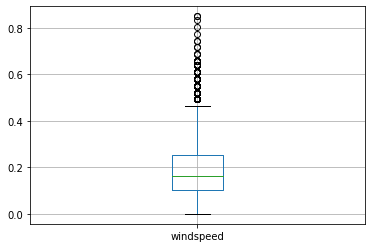

In [ ]:
#NOVOidentificando possíveis outliers
#new = [['windspeed','dteday']].boxplot()
new[['windspeed']].boxplot()


**Existem Possíveis Outliers?**

In [ ]:
#NOVOmatriz correlação
#plt.matshow(new.corr())
#plt.show()
#import seaborn as sns
#plt.figure(figsize=(20,10))

#sns.heatmap(new.corr(), annot=True) # desenha a matriz de correlação entre cada um dos dados
corr = df_new[["cnt", "hum","season", "temp", "atemp", "windspeed"]].corr()
corr.style.format("{:.2}").background_gradient(cmap=plt.get_cmap('PuRd'))


,cnt,hum,temp,atemp,windspeed
cnt,1.0,-0.32,0.41,0.4,0.092
hum,-0.32,1.0,-0.07,-0.054,-0.29
temp,0.41,-0.07,1.0,0.99,-0.016
atemp,0.4,-0.054,0.99,1.0,-0.059
windspeed,0.092,-0.29,-0.016,-0.059,1.0


In [ ]:
#NOVO MATRIZ Plot a matriz de correlação. Sobre as variáveis "hum" e "cnt", é CORRETO afirmar:

df_bikes1 = df_bikes[['season', 'temp', 'atemp', 'hum', 'windspeed']]

In [ ]:
#NOVO
df_bikes[['hum', 'cnt']].corr()

,hum,cnt
hum,1.000000,-0.323834
cnt,-0.323834,1.000000


In [ ]:
#NOVAverificando existencia de dados nulos
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15641 entries, 1 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     14060 non-null  float64       
 1   dteday      15641 non-null  datetime64[ns]
 2   season      14061 non-null  category      
 3   yr          14076 non-null  float64       
 4   mnth        14062 non-null  float64       
 5   hr          14068 non-null  float64       
 6   holiday     14076 non-null  float64       
 7   weekday     14078 non-null  float64       
 8   workingday  14097 non-null  float64       
 9   weathersit  14078 non-null  float64       
 10  temp        14066 non-null  float64       
 11  atemp       14076 non-null  float64       
 12  hum         14070 non-null  float64       
 13  windspeed   14082 non-null  float64       
 14  casual      14071 non-null  float64       
 15  registered  14090 non-null  float64       
 16  cnt         14079 non-

In [ ]:
# NOVA Preencha os valores nulos das colunas "hum","cnt" e "casual" com os valores médios
df_new['hum'].fillna((df_new['hum'].mean()), inplace=True)
df_new['cnt'].fillna((df_new['cnt'].mean()), inplace=True)
df_new['casual'].fillna((df_new['casual'].mean()), inplace=True)



/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:4535: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [ ]:
#NOVA 
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15641 entries, 1 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     14060 non-null  float64       
 1   dteday      15641 non-null  datetime64[ns]
 2   season      14061 non-null  category      
 3   yr          14076 non-null  float64       
 4   mnth        14062 non-null  float64       
 5   hr          14068 non-null  float64       
 6   holiday     14076 non-null  float64       
 7   weekday     14078 non-null  float64       
 8   workingday  14097 non-null  float64       
 9   weathersit  14078 non-null  float64       
 10  temp        14066 non-null  float64       
 11  atemp       14076 non-null  float64       
 12  hum         15641 non-null  float64       
 13  windspeed   14082 non-null  float64       
 14  casual      15641 non-null  float64       
 15  registered  14090 non-null  float64       
 16  cnt         15641 non-

In [ ]:
#NOVA Utilize as variáveis "hum" e "casual" como independentes e a "cnt" como dependente. Aplique uma regressão linear.
#X = df_new['hum','casual'].values.reshape(-1,3))
#y = df_new['cnt'].values

In [ ]:
#NOVA
df_new.isnull().sum()

instant       1581
dteday           0
season        1580
yr            1565
mnth          1579
hr            1573
holiday       1565
weekday       1563
workingday    1544
weathersit    1563
temp          1575
atemp         1565
hum              0
windspeed     1559
casual           0
registered    1551
cnt              0
dtype: int64

In [ ]:
#importa o modelo de regressão linear univariada
from sklearn.linear_model import LinearRegression

In [ ]:
#NOVA - regressão com 2 variáveis independentes
features = ['hum', 'casual']
target = 'cnt'

In [ ]:
#NOVO realizando a análise de regressão hum e casual devem ser variáveis independentes e cnt var dependente 
X = df_new[features].values.reshape(-1, len(features)) #variáveis independentes
Y = df_new[target].values

In [ ]:
#NOVO Realiza a construção do modelo de regressão
reg= LinearRegression()
model = reg.fit(X, Y)

In [ ]:
#NOVO realiza a previsão
model.predict(X)
model.coef_

array([-99.75012328,   2.21512197])

In [ ]:
#NOVO
model.intercept_

173.29337505135578

In [ ]:
#análise do modelo
from sklearn.metrics import r2_score #método para o cálculo do R2 (coeficiente de determinação)

In [ ]:
#NOVA realiza a previsão
previsao=model.predict(X)

In [ ]:
#parâmetros encontrados
print('Y = {}X {}'.format(reg.coef_,reg.intercept_))

R_2 = r2_score(Y, previsao)  #realiza o cálculo do R2

print("Coeficiente de Determinação (R2):", R_2)


Y = [-99.75012328   2.21512197]X 173.29337505135578
Coeficiente de Determinação (R2): 0.4059859251122173


**"hum" e "casual" como variáveis independentes e"cnt" como variavel dependente. Aplique Árvore de Decisão como regressão**

In [ ]:
#NOVA - árvore de decisão
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
# model = tree.DecisionTreeRegressor() para regressão
tree_new = DecisionTreeRegressor()

# Treina o modelo usando os dados de treino e de teste confere o score
#model.fit(X, y)
#model.score(X, y)
tree_new.fit(X,Y)
tree_new.score(X, Y)

#Prevê o resultado
predicted= tree_new.predict(X)

R_2 = r2_score(Y, predicted)  #realiza o cálculo do R2
print("Coeficiente de Determinação (R2):", R_2)



Coeficiente de Determinação (R2): 0.7098339715834964


In [ ]:
#NOVO IMPORTA BIBLIOTECA PARA SVM
from sklearn.svm import SVR

In [ ]:
#cria o objeto SVM
modelSVM = SVR() 

In [ ]:
#NOVO aplica o treinamento ao modelo
modelSVM.fit(X, Y)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [ ]:
#NOVA - SVM
previsao = modelSVM.predict(X) #aplica o modelo para os dados de teste

In [ ]:
#NOVA CALCULA A REGRESSAO
R_2 = r2_score(Y, previsao)  #realiza o cálculo do R2
print("Coeficiente de Determinação (R2):", R_2)

Coeficiente de Determinação (R2): 0.4017994745187701
